# Define ( inconsistencies and existing issues)

 
* Check patient id and remove duplicate rows

* Patient age quantile (0-19)

* Sars-Cov-2 exam result has values positive and negative. Need to replace 0 for negative and 1 for positive

* Pateint admiited to regular ward ( name needs to be modified)

* Pateint admiited to semi-icu ( modify name)

* hematocrit - make blanks as nulls 

* mean platelet volume (modify name)

* Mean corpuscular hemoglobin concentraion (modify name)

* Mean corpuscular volume (modify name)

* Red blood cell distribution width (RDW) (modify name)

* Encode detected as 1 and not detected as 0 
Respiratory Syncytial Virus, Influenza A, Influenza B, Parainfluenza 1, CoronavirusNL63, Rhinovirus/Enterovirus, Coronavirus HKU1, Parainfluenza 3, Chlaymidophila pnuemoniae, adenovirus, parainfluenza 4, Coronavirus229E, CoronavirusOC43, Inf A H1N1 2009, Bordetella pertusis, Metapnuemovirus, Parainfluenza 2, 

* Remove columns - Mycoplasma pnuemoniae, Fio2, Myeloblasts, Urine_Esterase ( absent/not_done), Urine - Bile pigments, Urine Ketone, Urine Nitrite, Urine Protein, Urine Sugar, Urine - Hyaline Cylinders, Urine Granular cylinders, Urine - Yeasts, PTT, PT Activity, D-Dimer, 

* Change name - Proteina C reactiva to C-reactive protein or CRP

* Influenza B Rapid test, Inf A rapud test ( name change) encode positive as 1, negative as 0  

* Merge with InfA and B columns

* Strepto A ( not_done to be changed to null values)

* pC02 vs pO2 venous blood gas analysis, check to see if its redundant

* Urine ph - replace nao realizado as null

* Urine hemoglobin - not_done to be replaced as null 

* Urine - Urobilinogen (normal, not_done) - check if can be removed

* Urine Crystals -- > Categorical variables
 









# Code

In [54]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [55]:
#from google.colab import drive
#drive.mount('/content/drive')

In [56]:
#df = pd.read_excel('/content/drive/My Drive/Minicapstone/dataset.xlsx')
df=pd.read_excel('dataset.xlsx')

In [57]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.shape
#df.describe()

(5644, 111)

In [59]:
# Renaming some of the columns for easier access

df.rename(columns = {'Patient addmited to regular ward (1=yes, 0=no)' : 'regular_ward',
                     'Patient addmited to semi-intensive unit (1=yes, 0=no)' : 'semi_icu',
                     'Patient addmited to intensive care unit (1=yes, 0=no)' : 'icu',
                     'SARS-Cov-2 exam result' : 'sars_cov2',
                     'Mean corpuscular hemoglobin concentration (MCHC)' : 'MCHC',
                     'Mean corpuscular hemoglobin (MCH)' : 'MCH',
                     'Mean corpuscular volume (MCV)' : 'MCV',
                     'Red blood cell distribution width (RDW)' : 'RBC_DW',
                     'Proteina C reativa mg/dL' : 'CRP'      # C-Reactive Protein
                     }, inplace=True)

In [60]:
df.head()

,Patient ID,Patient age quantile,sars_cov2,regular_ward,semi_icu,icu,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,MCH,Eosinophils,MCV,Monocytes,RBC_DW,Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Replacing 'negative' as 0 and 'positive' as 1 and other values across the dataframe

df.replace({'negative': 0, 'positive' : 1, 
            'not_detected': 0, 'detected':1, 
            'not_done' : np.nan, 'Não Realizado' : np.nan,
            'absent' : 0, 'normal' : 0
            }, inplace=True)

In [62]:
df.head()

,Patient ID,Patient age quantile,sars_cov2,regular_ward,semi_icu,icu,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,MCH,Eosinophils,MCV,Monocytes,RBC_DW,Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.619086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.sars_cov2.value_counts()

0    5086
1     558
Name: sars_cov2, dtype: int64

In [64]:
# Creating a copy before removing columns
cov_df = df.copy()

In [65]:
# Removing those columns that had either nulls or 'not_done' or 'absent' as values which do not add much information to our dataset
# Mycoplasma pnuemoniae, Fio2, Myeloblasts, Urine_Esterase ( absent/not_done), Urine - Bile pigments, Urine Ketone, Urine Nitrite, 
# Urine Protein, Urine Sugar, Urine - Hyaline Cylinders, Urine Granular cylinders, Urine - Yeasts, PTT, PT Activity, D-Dimer

# Also removing Influenza A, Rapid test and Influenza B Rapid test because we also have Influenza A & B columns

cov_df.drop(columns = ['Mycoplasma pneumoniae',
                       'Influenza B, rapid test',
                       'Influenza A, rapid test',
                       'Fio2 (venous blood gas analysis)',
                       'Myeloblasts',
                       'Urine - Esterase',
                       'Urine - Bile pigments',
                       'Urine - Ketone Bodies',
                       'Urine - Nitrite',
                       'Urine - Urobilinogen',
                       'Urine - Protein',
                       'Urine - Sugar',
                       'Urine - Hyaline cylinders',
                       'Urine - Yeasts',
                       'Prothrombin time (PT), Activity',
                       'D-Dimer',
                       'Partial thromboplastin time\xa0(PTT)\xa0'
                        ], axis=1, inplace=True)

In [66]:
cov_df.shape

(5644, 94)

In [67]:
cov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 94 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient ID                                        5644 non-null   object 
 1   Patient age quantile                              5644 non-null   int64  
 2   sars_cov2                                         5644 non-null   int64  
 3   regular_ward                                      5644 non-null   int64  
 4   semi_icu                                          5644 non-null   int64  
 5   icu                                               5644 non-null   int64  
 6   Hematocrit                                        603 non-null    float64
 7   Hemoglobin                                        603 non-null    float64
 8   Platelets                                         602 non-null    float64
 9   Mean platelet volum

In [68]:
cov_df['Relationship (Patient/Normal)'].unique()

array([            nan, -8.94807428e-02,  9.93859023e-04,  9.14684609e-02,
       -4.51379180e-01, -3.60904574e-01,  1.90096271e+00,  1.81944147e-01,
       -2.70429939e-01,  9.96215582e-01,  4.70567846e+00, -1.35612631e+00,
       -5.41853786e-01,  1.35811508e+00, -9.94227290e-01, -6.32328331e-01,
       -1.79955348e-01, -1.17517650e+00,  1.26764047e+00,  1.08669019e+00,
       -1.26565111e+00,  8.15266371e-01,  4.53367949e-01,  9.05740976e-01,
        3.62893343e-01,  2.72418737e-01, -1.08470190e+00,  6.34317160e-01,
       -7.22802937e-01,  2.08191180e+00, -8.13278079e-01,  5.43842554e-01,
        1.72001350e+00,  3.07713366e+00,  1.17716479e+00, -2.35134745e+00])

In [69]:
cov_df['sars_cov2'][cov_df['Albumin'].notnull()]
cov_df['sars_cov2'][cov_df['Lipase dosage'].notnull()]
cov_df['sars_cov2'][cov_df['Ferritin'].notnull()]
cov_df['sars_cov2'][cov_df['Hb saturation (arterial blood gases)'].notnull()]

330     0
334     0
1179    0
1260    0
1383    0
1388    0
1867    0
2497    0
3538    0
4355    0
4560    0
4737    0
4998    0
Name: sars_cov2, dtype: int64

2497    0
3121    0
3620    0
4114    0
4346    1
4459    1
5229    0
5256    1
Name: sars_cov2, dtype: int64

294     0
330     0
333     0
334     0
730     0
776     0
1260    0
1383    0
1388    0
1610    0
2497    0
2625    0
3435    0
3620    0
3655    0
3728    0
3744    0
4560    0
4737    0
4871    0
5161    1
5214    0
5341    1
Name: sars_cov2, dtype: int64

412     0
1317    0
1338    0
2528    0
4535    1
4910    0
4926    0
4933    0
5009    1
5010    0
5066    0
5069    1
5099    0
5161    1
5165    1
5172    0
5196    1
5210    1
5226    1
5250    1
5329    1
5410    0
5423    1
5511    0
5564    1
5566    1
5602    0
Name: sars_cov2, dtype: int64

Columns 'Albumin', 'Vitamin B12','Ferritin' can also be removed since the only null values do not respond to our target class of interest ('sars_cov2')

In [70]:
cov_df.drop(columns = ['Albumin',
                       'Ferritin',
                       'Vitamin B12',
                        ], axis=1, inplace=True)

Now, we shall be looking at the percentage nulls column wise and selecting the features accordingly. 

In [71]:
cov_df.shape

(5644, 91)

In [72]:
pct_null = cov_df.isna().mean().round(4)*100
pct_null.sort_values(ascending=False).head(50)

Lipase dosage                                99.86
Phosphor                                     99.65
Arteiral Fio2                                99.65
Base excess (arterial blood gas analysis)    99.52
Arterial Lactic Acid                         99.52
Hb saturation (arterial blood gases)         99.52
pCO2 (arterial blood gas analysis)           99.52
ctO2 (arterial blood gas analysis)           99.52
pH (arterial blood gas analysis)             99.52
HCO3 (arterial blood gas analysis)           99.52
pO2 (arterial blood gas analysis)            99.52
Total CO2 (arterial blood gas analysis)      99.52
Magnesium                                    99.29
Ionized calcium                              99.11
Urine - Granular cylinders                   98.78
Urine - Hemoglobin                           98.78
Urine - pH                                   98.78
Urine - Color                                98.76
Urine - Crystals                             98.76
Urine - Leukocytes             

(array([ 6.,  0.,  0.,  0.,  0.,  0.,  0., 17., 14., 54.]),
 array([ 0.   ,  9.986, 19.972, 29.958, 39.944, 49.93 , 59.916, 69.902,
        79.888, 89.874, 99.86 ]),
 <a list of 10 Patch objects>)

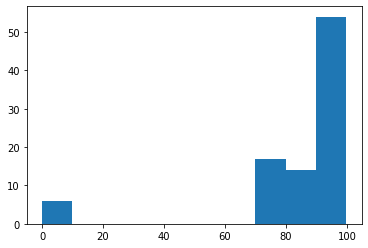

In [73]:
plt.hist(pct_null)

Despite eliminating columns earlier that had 100 % null values we are still left with columns that have a huge amount of null values and thus we shall be removing columns that have more than 95% null values. Imputing 90% of the data on the basis of 10% would not make sense. 

The set of features that fall into this maily comprise of the following tests : 

*   Urine analysis
*   Blood gas analysis ( Arterial and Venous)
*   Liver profile tests

Although Sodium and Potassium also have 93% null values, we shall be retaining these for now since some preliminary research suggests potassium levels to be a good marker. At the same time Magnesium would be removed because it has more than 99% null values and it is unreasonable for our model to be able to learn insights based on a handful of values.  

Columns 20 : 36 RSV - Parainfluenza 2 are tests of different viruses. These clinical tests indicate if the patient has one of these flu, the chances are very high, they are not infected with covid-19. Hence these are a very good marker of our target class. 

In [74]:
cov_df.iloc[:,20:37].var()

Serum Glucose                  1.004831
Respiratory Syncytial Virus    0.036957
Influenza A                    0.013127
Influenza B                    0.053674
Parainfluenza 1                0.002216
CoronavirusNL63                0.032200
Rhinovirus/Enterovirus         0.201892
Coronavirus HKU1               0.014585
Parainfluenza 3                0.007347
Chlamydophila pneumoniae       0.006617
Adenovirus                     0.009530
Parainfluenza 4                0.013866
Coronavirus229E                0.006617
CoronavirusOC43                0.005887
Inf A H1N1 2009                0.067281
Bordetella pertussis           0.001478
Metapneumovirus                0.010255
dtype: float64

Parainfluenza 2 has zero variance which means it has not been detected in any of the patients and doesn't add any value and hence needs to be dropped. 

In [75]:
cov_df.shape

(5644, 91)

In [76]:
cov_df.info()    # Main dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 91 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient ID                                        5644 non-null   object 
 1   Patient age quantile                              5644 non-null   int64  
 2   sars_cov2                                         5644 non-null   int64  
 3   regular_ward                                      5644 non-null   int64  
 4   semi_icu                                          5644 non-null   int64  
 5   icu                                               5644 non-null   int64  
 6   Hematocrit                                        603 non-null    float64
 7   Hemoglobin                                        603 non-null    float64
 8   Platelets                                         602 non-null    float64
 9   Mean platelet volum

Making subsets (columnwise):

1. blood_df ----columns: 0-20, 52-65, 77-90

2. flu_df   ----columns: 0-5, 21-37

3. liver_df ----columns: 0-5, 44-50

4. urine_df ----columns: 0-5, 66-74

FLU, LIVER and URINE subsets

In [77]:
flu_df=cov_df.iloc[:,21:38]
liver_df=cov_df.iloc[:,44:51]
urine_df=cov_df.iloc[:,66:75]

In [78]:
for i in range(0,6):
    name=cov_df.iloc[:,i].name
    flu_df[name]=cov_df.iloc[:,i].values
    liver_df[name]=cov_df.iloc[:,i].values
    urine_df[name]=cov_df.iloc[:,i].values

BLOOD subset

In [79]:
blood_df = cov_df.iloc[:,0:21]
#blood_df.info()

In [80]:
for i in range(38,44):
    name=cov_df.iloc[:,i].name
    blood_df[name]=cov_df.iloc[:,i].values

In [81]:
blood_df.columns

Index(['Patient ID', 'Patient age quantile', 'sars_cov2', 'regular_ward',
       'semi_icu', 'icu', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'MCH', 'Eosinophils', 'MCV', 'Monocytes', 'RBC_DW',
       'Serum Glucose', 'Neutrophils', 'Urea', 'CRP', 'Creatinine',
       'Potassium', 'Sodium'],
      dtype='object')

In [82]:
blood_df.shape

(5644, 27)

In [83]:
for i in range(52,66):
    name=cov_df.iloc[:,i].name
    blood_df[name]=cov_df.iloc[:,i].values

In [84]:
for i in range(77,91):
    name=cov_df.iloc[:,i].name
    blood_df[name]=cov_df.iloc[:,i].values

In [85]:
blood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient ID                                        5644 non-null   object 
 1   Patient age quantile                              5644 non-null   int64  
 2   sars_cov2                                         5644 non-null   int64  
 3   regular_ward                                      5644 non-null   int64  
 4   semi_icu                                          5644 non-null   int64  
 5   icu                                               5644 non-null   int64  
 6   Hematocrit                                        603 non-null    float64
 7   Hemoglobin                                        603 non-null    float64
 8   Platelets                                         602 non-null    float64
 9   Mean platelet volum

In [86]:
blood_df=blood_df.drop(columns=['Magnesium','Lipase dosage'],axis=1)

In [87]:
blood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 53 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient ID                                        5644 non-null   object 
 1   Patient age quantile                              5644 non-null   int64  
 2   sars_cov2                                         5644 non-null   int64  
 3   regular_ward                                      5644 non-null   int64  
 4   semi_icu                                          5644 non-null   int64  
 5   icu                                               5644 non-null   int64  
 6   Hematocrit                                        603 non-null    float64
 7   Hemoglobin                                        603 non-null    float64
 8   Platelets                                         602 non-null    float64
 9   Mean platelet volum

In [88]:
blood_df=blood_df.drop(columns=blood_df.iloc[:,28:53].columns,axis=1)

In [89]:
blood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient ID                                        5644 non-null   object 
 1   Patient age quantile                              5644 non-null   int64  
 2   sars_cov2                                         5644 non-null   int64  
 3   regular_ward                                      5644 non-null   int64  
 4   semi_icu                                          5644 non-null   int64  
 5   icu                                               5644 non-null   int64  
 6   Hematocrit                                        603 non-null    float64
 7   Hemoglobin                                        603 non-null    float64
 8   Platelets                                         602 non-null    float64
 9   Mean platelet volum

In [90]:
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Respiratory Syncytial Virus  1354 non-null   float64
 1   Influenza A                  1354 non-null   float64
 2   Influenza B                  1354 non-null   float64
 3   Parainfluenza 1              1352 non-null   float64
 4   CoronavirusNL63              1352 non-null   float64
 5   Rhinovirus/Enterovirus       1352 non-null   float64
 6   Coronavirus HKU1             1352 non-null   float64
 7   Parainfluenza 3              1352 non-null   float64
 8   Chlamydophila pneumoniae     1352 non-null   float64
 9   Adenovirus                   1352 non-null   float64
 10  Parainfluenza 4              1352 non-null   float64
 11  Coronavirus229E              1352 non-null   float64
 12  CoronavirusOC43              1352 non-null   float64
 13  Inf A H1N1 2009   

In [91]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alanine transaminase        225 non-null    float64
 1   Aspartate transaminase      226 non-null    float64
 2   Gamma-glutamyltransferase   153 non-null    float64
 3   Total Bilirubin             182 non-null    float64
 4   Direct Bilirubin            182 non-null    float64
 5   Indirect Bilirubin          182 non-null    float64
 6   Alkaline phosphatase        144 non-null    float64
 7   Patient ID                  5644 non-null   object 
 8   Patient age quantile        5644 non-null   int64  
 9   sars_cov2                   5644 non-null   int64  
 10  regular_ward                5644 non-null   int64  
 11  semi_icu                    5644 non-null   int64  
 12  icu                         5644 non-null   int64  
dtypes: float64(7), int64(5), object(1

In [92]:
urine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Urine - Aspect              70 non-null     object 
 1   Urine - pH                  69 non-null     object 
 2   Urine - Hemoglobin          69 non-null     object 
 3   Urine - Density             70 non-null     float64
 4   Urine - Leukocytes          70 non-null     object 
 5   Urine - Crystals            70 non-null     object 
 6   Urine - Red blood cells     70 non-null     float64
 7   Urine - Granular cylinders  69 non-null     float64
 8   Urine - Color               70 non-null     object 
 9   Patient ID                  5644 non-null   object 
 10  Patient age quantile        5644 non-null   int64  
 11  sars_cov2                   5644 non-null   int64  
 12  regular_ward                5644 non-null   int64  
 13  semi_icu                    5644 

In [93]:
mdf=blood_df.merge(flu_df)

In [94]:
mdf=mdf.merge(liver_df[['Patient ID','Patient age quantile','sars_cov2','regular_ward','semi_icu','icu','Alanine transaminase','Aspartate transaminase']])


In [95]:
mdf

,Patient ID,Patient age quantile,sars_cov2,regular_ward,semi_icu,icu,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,MCH,Eosinophils,MCV,Monocytes,RBC_DW,Serum Glucose,Neutrophils,Urea,CRP,Creatinine,Potassium,Sodium,Strepto A,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Alanine transaminase,Aspartate transaminase
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
a=mdf.count(axis=1) # number of non-null values-rowwise
a

0        6
1       44
2        6
3        6
4       23
        ..
5639     6
5640     6
5641     6
5642     6
5643    28
Length: 5644, dtype: int64

In [97]:
for i in range(0,5644):
    a[i]=(47-a[i])
    a[i]/=0.47

In [98]:
a   # percentage of null values for each row

0       87
1        6
2       87
3       87
4       51
        ..
5639    87
5640    87
5641    87
5642    87
5643    40
Length: 5644, dtype: int64

In [99]:
rows_ind=[]
for i in range(0,5644):
    if(a[i]>=10):     # If null values >= 10 percent
        rows_ind.append(i)
        

In [100]:
r=np.array(rows_ind)  #Indices of rows to be dropped
r.shape

(5390,)

In [101]:
mdf_copy=mdf.copy()

In [102]:
mdf_copy=mdf_copy.drop(index=r,axis=0)

In [103]:
mdf_copy.head()

,Patient ID,Patient age quantile,sars_cov2,regular_ward,semi_icu,icu,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,MCH,Eosinophils,MCV,Monocytes,RBC_DW,Serum Glucose,Neutrophils,Urea,CRP,Creatinine,Potassium,Sodium,Strepto A,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Alanine transaminase,Aspartate transaminase
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,-0.413208,-0.127395,-0.067309,-0.286986,-1.838623,0.930020,0.503132,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.586821,-0.162200
15,6c9d3323975b082,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,NaN,0.880570,-0.811643,NaN,-0.908177,0.435697,-0.215628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.559257,-0.549287
30,ebdd7c67fcb21b4,9,0,1,0,0,-0.679027,-0.711556,0.952319,-0.886869,-0.321124,-0.875701,-0.253742,-0.286623,-0.223767,-0.710443,-0.540532,-0.675050,0.804021,-0.890442,-0.413208,0.782232,-0.439476,0.545572,1.021638,0.435697,-1.653147,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
50,11e4956b770f080,17,0,0,0,0,1.014726,0.666876,-0.203368,0.459449,0.295938,-0.261609,-0.950790,-0.083479,-0.223767,0.544077,0.133698,1.167670,-0.246507,-0.359703,-0.564631,0.388879,0.825892,-0.461843,2.124389,-0.800110,0.862512,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.366304,-0.510579


In [104]:
mdf_copy.shape

(254, 47)

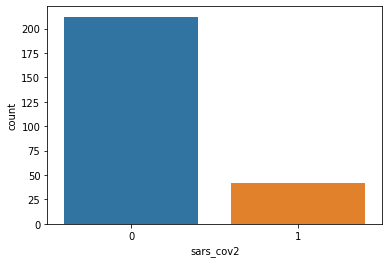

In [105]:
sns.countplot(mdf_copy['sars_cov2'])

In [106]:
mdf_copy['sars_cov2'].value_counts()    # make 127 samples for each class

0    212
1     42
Name: sars_cov2, dtype: int64

In [107]:
mdf_copy.to_csv('icu_without_sampling.csv')   # For further use in Task1- Covid prediction_extended dataset and Task 2- Admission Prediction